<a href="https://colab.research.google.com/github/Neermalsha/Information-Retrieval-/blob/main/Nirmal_W5_Using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tensorflow matplotlib


In [ ]:
import pandas as pd

# Path to your dataset in Google Drive
dataset_path = '/content/drive/MyDrive/seattle-weather.csv'

# Load the dataset
data = pd.read_csv(dataset_path)

# Check the first few rows of the data
print(data.head())


         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Load the IMDB dataset (Sentiment Analysis - binary classification)
max_words = 10000  # Top 10,000 words in the dataset
max_len = 100  # Maximum length of input sequences
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Pad the sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [ ]:
# Build the RNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(SimpleRNN(128, activation='tanh'))
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model with early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 39s 99ms/step - accuracy: 0.8324 - loss: 0.3937 - val_accuracy: 0.8164 - val_loss: 0.4150
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 38s 96ms/step - accuracy: 0.8641 - loss: 0.3290 - val_accuracy: 0.8209 - val_loss: 0.4087
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 94ms/step - accuracy: 0.8986 - loss: 0.2643 - val_accuracy: 0.8249 - val_loss: 0.4222
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - accuracy: 0.9099 - loss: 0.2374 - val_accuracy: 0.8234 - val_loss: 0.4743
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.9318 - loss: 0.1918 - val_accuracy: 0.8164 - val_loss: 0.4749


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8089 - loss: 0.4278
Test Accuracy: 81.17%


In [ ]:
# Save the model for later use
model.save('sentiment_rnn_model.h5')


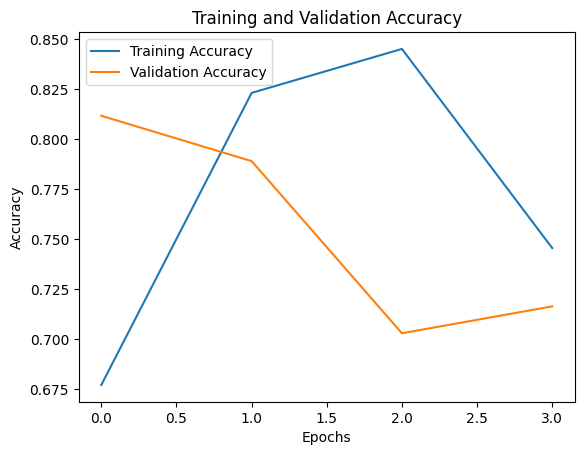

In [ ]:
# Plot the training and validation accuracy over epochs
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Generate predictions on test data
predictions = model.predict(x_test[:5])
print("Predictions for first 5 test samples:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
Predictions for first 5 test samples: [[0.4693559]
 [0.8443281]
 [0.7546348]
 [0.796601 ]
 [0.8765651]]
